In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
# Read in the data
drought_data = pd.read_csv('C:\\Users\\sriva\\Downloads\\drought_data.csv')
drought_intensity_data = pd.read_csv('C:\\Users\\sriva\\Downloads\\drought_intensity_data.csv')
drought_population = pd.read_csv('C:\\Users\\sriva\\Downloads\\drought_population.csv')

In [17]:
drought_data.head()

,FIPS,StartDate,EndDate,ConsecutiveWeeks,State,County
0,40001,1/22/2015,5/21/2015,18,OK,Adair County
1,40001,10/15/2015,11/12/2015,5,OK,Adair County
2,40001,3/31/2016,4/28/2016,5,OK,Adair County
3,40001,7/14/2016,4/27/2017,41,OK,Adair County
4,40001,9/21/2017,3/1/2018,23,OK,Adair County


In [18]:
drought_intensity_data.head()

,MapDate,FIPS,County,State,None,D0,D1,D2,D3,D4,ValidStart,ValidEnd,StatisticFormatID
0,20221227,40001,Adair,OK,563.44,13.94,0.00,0.0,0.0,0.0,12/27/2022,1/2/2023,1
1,20221220,40001,Adair,OK,563.44,13.94,0.00,0.0,0.0,0.0,12/20/2022,12/26/2022,1
2,20221213,40001,Adair,OK,567.05,10.33,0.00,0.0,0.0,0.0,12/13/2022,12/19/2022,1
3,20221206,40001,Adair,OK,0.00,577.38,10.72,0.0,0.0,0.0,12/6/2022,12/12/2022,1
4,20221129,40001,Adair,OK,0.00,577.38,10.72,0.0,0.0,0.0,11/29/2022,12/5/2022,1


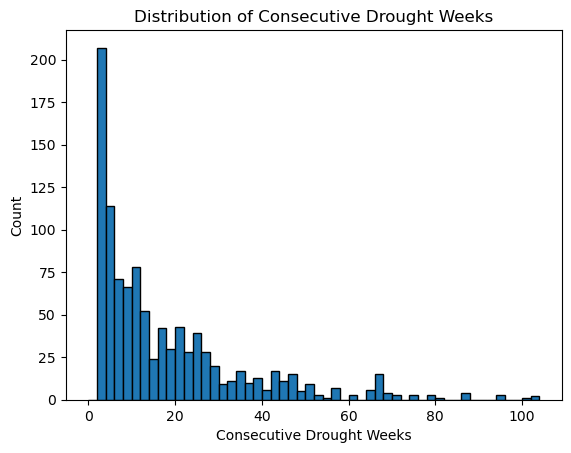

In [19]:
# Create a histogram of consecutive drought weeks
plt.hist(drought_data['ConsecutiveWeeks'], bins=range(0, max(drought_data['ConsecutiveWeeks']) + 1, 2), edgecolor='black')
plt.xlabel('Consecutive Drought Weeks')
plt.ylabel('Count')
plt.title('Distribution of Consecutive Drought Weeks')
plt.show()

In [20]:
drought_intensity_data.dtypes

MapDate                int64
FIPS                   int64
County                object
State                 object
None                 float64
D0                   float64
D1                   float64
D2                   float64
D3                   float64
D4                   float64
ValidStart            object
ValidEnd              object
StatisticFormatID      int64
dtype: object

### Analyzing which counties have had maximum land under high-intensity droughts

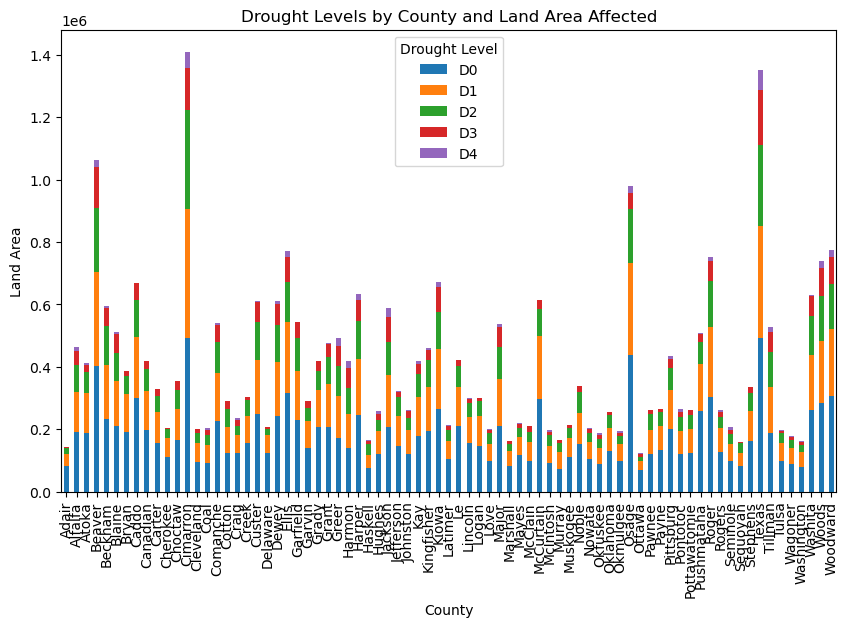

In [21]:
# Sum the drought levels for each county
county_drought = drought_intensity_data.drop(['MapDate', 'FIPS', 'ValidStart','ValidEnd', 'StatisticFormatID'], axis=1)
county_drought = county_drought.groupby(['County'])[['D0', 'D1', 'D2', 'D3', 'D4']].sum()

# Create a stacked bar chart of the drought levels by county
county_drought.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Drought Levels by County and Land Area Affected')
plt.xlabel('County')
plt.ylabel('Land Area')
plt.legend(title='Drought Level')
plt.show()


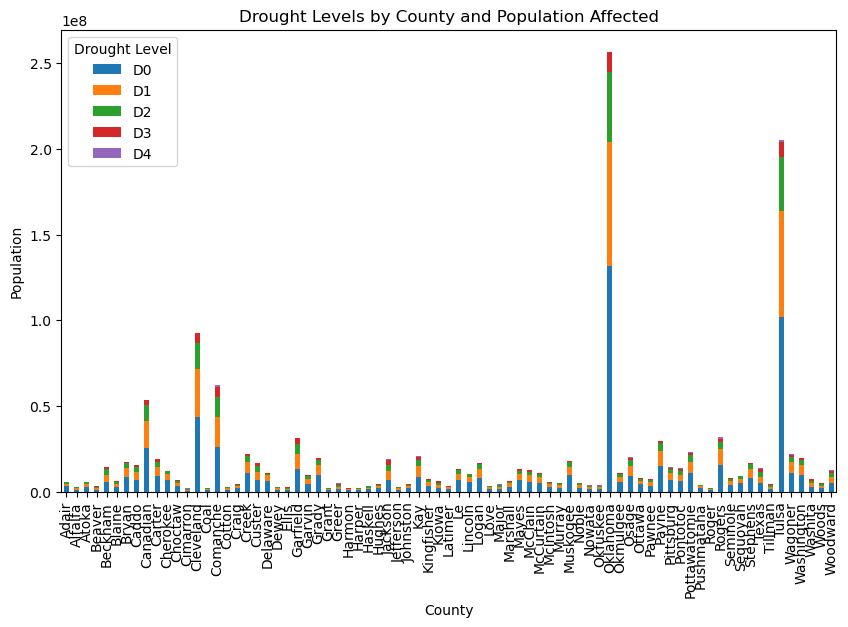

In [22]:
# Sum the drought levels for each county
county_drought = drought_population.drop(['MapDate', 'FIPS', 'ValidStart','ValidEnd', 'StatisticFormatID'], axis=1)
county_drought = county_drought.groupby(['County'])[['D0', 'D1', 'D2', 'D3', 'D4']].sum()

# Create a stacked bar chart of the drought levels by county
county_drought.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Drought Levels by County and Population Affected')
plt.xlabel('County')
plt.ylabel('Population')
plt.legend(title='Drought Level')
plt.show()


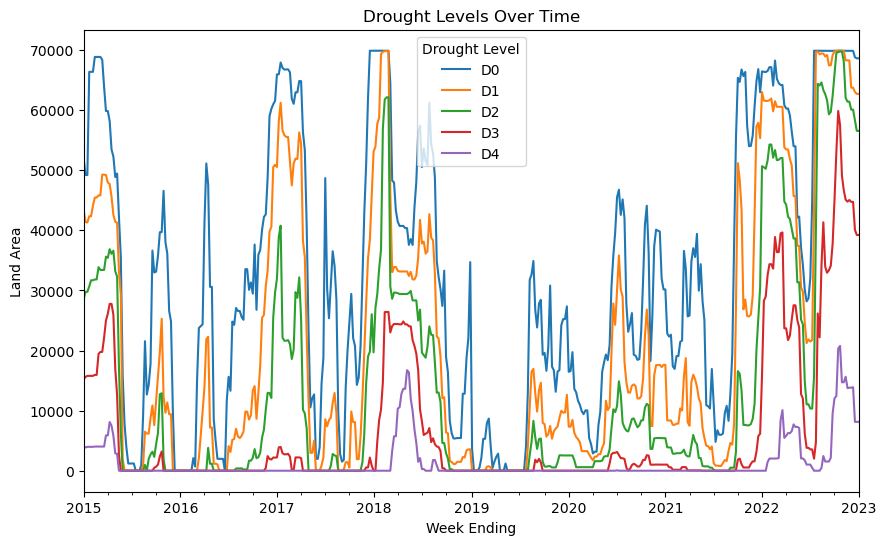

In [23]:
df = drought_intensity_data
# Convert the date columns to datetime format
df['ValidStart'] = pd.to_datetime(df['ValidStart'])
df['ValidEnd'] = pd.to_datetime(df['ValidEnd'])

# Calculate the total area of land covered by each drought level for each week
weekly_drought = df.groupby(['ValidEnd'])[['D0', 'D1', 'D2', 'D3', 'D4']].sum()

# Create a line chart of the drought levels over time
weekly_drought.plot(figsize=(10, 6))
plt.title('Drought Levels Over Time')
plt.xlabel('Week Ending')
plt.ylabel('Land Area')
plt.legend(title='Drought Level')
plt.show()

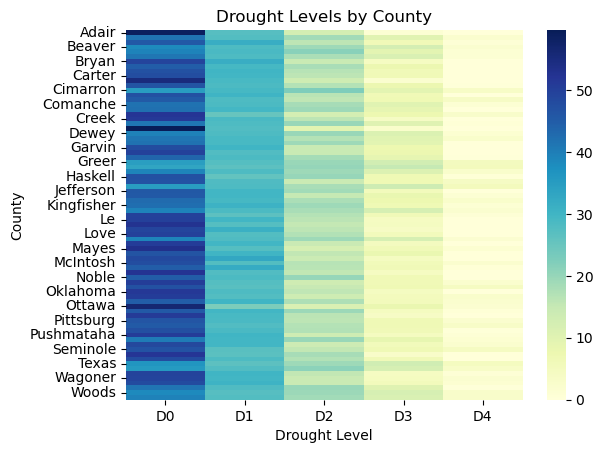

In [24]:
# Sum the drought levels for each state
state_drought = df.groupby(['County'])[['D0', 'D1', 'D2', 'D3', 'D4']].sum()

# Normalize the data to show percentages
state_drought_pct = state_drought.div(state_drought.sum(axis=1), axis=0) * 100

# Create a heatmap of the drought levels by state
sns.heatmap(state_drought_pct, cmap='YlGnBu')
plt.title('Drought Levels by County')
plt.xlabel('Drought Level')
plt.ylabel('County')
plt.show()

C:\Users\sriva\AppData\Local\Temp\ipykernel_26692\3596604759.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped = df.groupby(['ValidStart']).sum().reset_index()


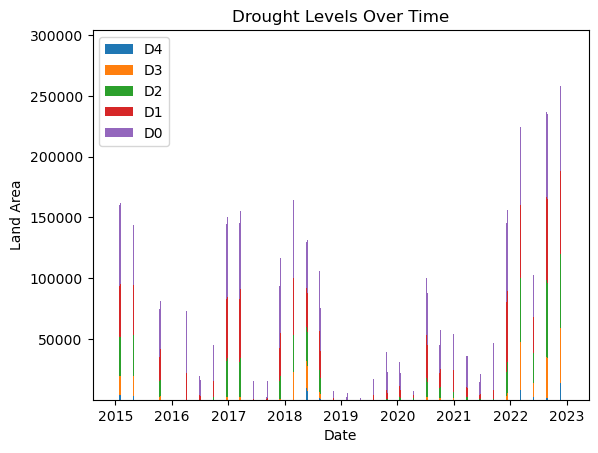

In [26]:
df = drought_intensity_data
# Group the data by date and sum the values for each drought level
grouped = df.groupby(['ValidStart']).sum().reset_index()

# Convert the ValidStart column to a datetime object
grouped['ValidStart'] = pd.to_datetime(grouped['ValidStart'])

# Create a stacked bar chart of the drought levels
plt.bar(grouped['ValidStart'], grouped['D4'], label='D4')
plt.bar(grouped['ValidStart'], grouped['D3'], bottom=grouped['D4'], label='D3')
plt.bar(grouped['ValidStart'], grouped['D2'], bottom=grouped['D4']+grouped['D3'], label='D2')
plt.bar(grouped['ValidStart'], grouped['D1'], bottom=grouped['D4']+grouped['D3']+grouped['D2'], label='D1')
plt.bar(grouped['ValidStart'], grouped['D0'], bottom=grouped['D4']+grouped['D3']+grouped['D2']+grouped['D1'], label='D0')

# Add labels and legend to the chart
plt.xlabel('Date')
plt.ylabel('Land Area')
plt.title('Drought Levels Over Time')
plt.legend()

# Display the chart
plt.show()